In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
from util import HISTORICAL_RULES_FILE , RESOURCE_DIR, IMAGES_DIR 
#pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

This script analyse this association rules find in the last version

In [2]:
df = pd.read_excel(RESOURCE_DIR + os.sep + 'historical_rulesv10.xlsx', keep_default_na=False) #'seq_patterns/testes/historical_rules_commit10_197reg_021.xlsx'
#df = pd.read_excel(HISTORICAL_RULES_FILE , keep_default_na=False)
df2 = df.copy()
len(df)
#df.head()
df2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,frozenset({'Firebird'}),frozenset({'Ingres'}),0.047619,0.021645,0.021645,0.454545,21.000000,0.020614,1.793651,1,1
1,frozenset({'Ingres'}),frozenset({'Firebird'}),0.021645,0.047619,0.021645,1.000000,21.000000,0.020614,inf,1,1
2,frozenset({'MS Access'}),frozenset({'Informix'}),0.030303,0.043290,0.021645,0.714286,16.500000,0.020333,3.348485,1,1
3,frozenset({'Informix'}),frozenset({'MS Access'}),0.043290,0.030303,0.021645,0.500000,16.500000,0.020333,1.939394,1,1
4,frozenset({'SAP SQL Anywhere'}),frozenset({'SAP Adaptive Server'}),0.064935,0.060606,0.060606,0.933333,15.400000,0.056671,14.090909,1,1
...,...,...,...,...,...,...,...,...,...,...,...
503,frozenset({'H2'}),frozenset({'DynamoDB'}),0.389610,0.125541,0.056277,0.144444,1.150575,0.007365,1.022095,1,1
504,frozenset({'Redis'}),frozenset({'SAP SQL Anywhere'}),0.350649,0.064935,0.025974,0.074074,1.140741,0.003205,1.009870,1,1
505,frozenset({'SAP SQL Anywhere'}),frozenset({'Redis'}),0.064935,0.350649,0.025974,0.400000,1.140741,0.003205,1.082251,1,1
506,frozenset({'SAP Adaptive Server'}),frozenset({'Redis'}),0.060606,0.350649,0.021645,0.357143,1.018519,0.000394,1.010101,1,1


In [3]:
df['antecedents'] = df['antecedents'].astype(str)
df['consequents'] = df['consequents'].astype(str)

In [4]:
#Extract the word "frozenset" of the dataframe
df['antecedents'] = df['antecedents'].apply(lambda x: x[len('frozenset({"'):-3])
df['consequents'] = df['consequents'].apply(lambda x: x[len('frozenset({"'):-3])
df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Firebird,Ingres,0.047619,0.021645,0.021645,0.454545,21.000000,0.020614,1.793651,1,1
1,Ingres,Firebird,0.021645,0.047619,0.021645,1.000000,21.000000,0.020614,inf,1,1
2,MS Access,Informix,0.030303,0.043290,0.021645,0.714286,16.500000,0.020333,3.348485,1,1
3,Informix,MS Access,0.043290,0.030303,0.021645,0.500000,16.500000,0.020333,1.939394,1,1
4,SAP SQL Anywhere,SAP Adaptive Server,0.064935,0.060606,0.060606,0.933333,15.400000,0.056671,14.090909,1,1
...,...,...,...,...,...,...,...,...,...,...,...
503,H2,DynamoDB,0.389610,0.125541,0.056277,0.144444,1.150575,0.007365,1.022095,1,1
504,Redis,SAP SQL Anywhere,0.350649,0.064935,0.025974,0.074074,1.140741,0.003205,1.009870,1,1
505,SAP SQL Anywhere,Redis,0.064935,0.350649,0.025974,0.400000,1.140741,0.003205,1.082251,1,1
506,SAP Adaptive Server,Redis,0.060606,0.350649,0.021645,0.357143,1.018519,0.000394,1.010101,1,1


In [5]:
#Create a new columns
df.insert(3,'antecedent_sup_abs', 0, True)
df.insert(5,'consequent_sup_abs', 0, True)
df.insert(7,'support_abs', 0, True)

#Converting the support relative values in absolut values
df['antecedent_sup_abs'] = (df['antecedent support']*197)
df['consequent_sup_abs'] = (df['consequent support']*197)
df['support_abs'] = (df['support']*197)
df

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Firebird,Ingres,0.047619,9.380952,0.021645,4.264069,0.021645,4.264069,0.454545,21.000000,0.020614,1.793651,1,1
1,Ingres,Firebird,0.021645,4.264069,0.047619,9.380952,0.021645,4.264069,1.000000,21.000000,0.020614,inf,1,1
2,MS Access,Informix,0.030303,5.969697,0.043290,8.528139,0.021645,4.264069,0.714286,16.500000,0.020333,3.348485,1,1
3,Informix,MS Access,0.043290,8.528139,0.030303,5.969697,0.021645,4.264069,0.500000,16.500000,0.020333,1.939394,1,1
4,SAP SQL Anywhere,SAP Adaptive Server,0.064935,12.792208,0.060606,11.939394,0.060606,11.939394,0.933333,15.400000,0.056671,14.090909,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,H2,DynamoDB,0.389610,76.753247,0.125541,24.731602,0.056277,11.086580,0.144444,1.150575,0.007365,1.022095,1,1
504,Redis,SAP SQL Anywhere,0.350649,69.077922,0.064935,12.792208,0.025974,5.116883,0.074074,1.140741,0.003205,1.009870,1,1
505,SAP SQL Anywhere,Redis,0.064935,12.792208,0.350649,69.077922,0.025974,5.116883,0.400000,1.140741,0.003205,1.082251,1,1
506,SAP Adaptive Server,Redis,0.060606,11.939394,0.350649,69.077922,0.021645,4.264069,0.357143,1.018519,0.000394,1.010101,1,1


In [6]:
df2 = df.copy()
df2

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Firebird,Ingres,0.047619,9.380952,0.021645,4.264069,0.021645,4.264069,0.454545,21.000000,0.020614,1.793651,1,1
1,Ingres,Firebird,0.021645,4.264069,0.047619,9.380952,0.021645,4.264069,1.000000,21.000000,0.020614,inf,1,1
2,MS Access,Informix,0.030303,5.969697,0.043290,8.528139,0.021645,4.264069,0.714286,16.500000,0.020333,3.348485,1,1
3,Informix,MS Access,0.043290,8.528139,0.030303,5.969697,0.021645,4.264069,0.500000,16.500000,0.020333,1.939394,1,1
4,SAP SQL Anywhere,SAP Adaptive Server,0.064935,12.792208,0.060606,11.939394,0.060606,11.939394,0.933333,15.400000,0.056671,14.090909,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,H2,DynamoDB,0.389610,76.753247,0.125541,24.731602,0.056277,11.086580,0.144444,1.150575,0.007365,1.022095,1,1
504,Redis,SAP SQL Anywhere,0.350649,69.077922,0.064935,12.792208,0.025974,5.116883,0.074074,1.140741,0.003205,1.009870,1,1
505,SAP SQL Anywhere,Redis,0.064935,12.792208,0.350649,69.077922,0.025974,5.116883,0.400000,1.140741,0.003205,1.082251,1,1
506,SAP Adaptive Server,Redis,0.060606,11.939394,0.350649,69.077922,0.021645,4.264069,0.357143,1.018519,0.000394,1.010101,1,1


Top 10 BDs Session
Presentation of the 10 most frequent BDs (consequents=antecedents).

In [7]:
rules1b = df2.sort_values(['support',], ascending=[False])
rules1b

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
412,MySQL,PostgreSQL,0.484848,95.515152,0.402597,79.311688,0.329004,64.813853,0.678571,1.685484,0.133806,1.858586,1,1
413,PostgreSQL,MySQL,0.402597,79.311688,0.484848,95.515152,0.329004,64.813853,0.817204,1.685484,0.133806,2.818182,1,1
453,MySQL,H2,0.484848,95.515152,0.389610,76.753247,0.290043,57.138528,0.598214,1.535417,0.101141,1.519192,1,1
452,H2,MySQL,0.389610,76.753247,0.484848,95.515152,0.290043,57.138528,0.744444,1.535417,0.101141,2.015810,1,1
358,PostgreSQL,Oracle,0.402597,79.311688,0.341991,67.372294,0.264069,52.021645,0.655914,1.917926,0.126384,1.912338,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,Google Cloud Datastore,SAP SQL Anywhere,0.129870,25.584416,0.064935,12.792208,0.021645,4.264069,0.166667,2.566667,0.013212,1.122078,1,1
218,H2,Ingres,0.389610,76.753247,0.021645,4.264069,0.021645,4.264069,0.055556,2.566667,0.013212,1.035905,1,1
219,Ingres,H2,0.021645,4.264069,0.389610,76.753247,0.021645,4.264069,1.000000,2.566667,0.013212,inf,1,1
242,PostgreSQL,Ingres,0.402597,79.311688,0.021645,4.264069,0.021645,4.264069,0.053763,2.483871,0.012931,1.033943,1,1


In [8]:
rules1a = df2[(df2['antecedent support'] >= 0.07)] #& (df['confidence'] > 0.7) ]
#rules2 = rules2.sort_values(['consequent support','support'], ascending=[False,False])
rules1a = rules1a.groupby('antecedents').mean().sort_values(['antecedent support',], ascending=[False])
rules1a

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
MySQL,0.484848,95.515152,0.115487,22.750873,0.094261,18.569334,0.194412,1.814098,0.038267,1.138424,1.0,1.0
PostgreSQL,0.402597,79.311688,0.118140,23.273565,0.088535,17.441419,0.219910,2.068051,0.040972,1.216320,1.0,1.0
H2,0.389610,76.753247,0.131954,25.995030,0.086420,17.024691,0.221811,1.856141,0.035009,1.173338,1.0,1.0
Redis,0.350649,69.077922,0.140693,27.716450,0.078644,15.492785,0.224280,1.831537,0.029310,1.146169,1.0,1.0
Oracle,0.341991,67.372294,0.125093,24.643380,0.082848,16.321093,0.242252,2.260817,0.040067,1.253321,1.0,1.0
HyperSQL,0.242424,47.757576,0.154073,30.352420,0.075364,14.846714,0.310877,2.638611,0.038013,1.367468,1.0,1.0
MS SQL Server,0.238095,46.904762,0.130019,25.613823,0.071503,14.086132,0.300313,2.798609,0.040546,1.871372,1.0,1.0
MongoDB,0.186147,36.670996,0.146320,28.825108,0.055758,10.984242,0.299535,2.774050,0.028520,1.310974,1.0,1.0
IBM DB2,0.134199,26.437229,0.157812,31.088941,0.060409,11.900630,0.450147,4.134152,0.039231,NaN,1.0,1.0


Top 10 BDs Session
Presentation of the 10 most frequent BDs (consequents=antecedents).

In [9]:
rules1 = df2[(df2['consequent support'] >= 0.13)] #0.07)] #& (df['confidence'] > 0.7) ]
#rules2 = rules2.sort_values(['consequent support','support'], ascending=[False,False])
rules1 = rules1.groupby('consequents').mean().sort_values(['consequent support',], ascending=[False])
rules1

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
consequents,,,,,,,,,,,,
MySQL,0.115487,22.750873,0.484848,95.515152,0.094261,18.569334,0.879563,1.814098,0.038267,NaN,1.0,1.0
PostgreSQL,0.118140,23.273565,0.402597,79.311688,0.088535,17.441419,0.832592,2.068051,0.040972,NaN,1.0,1.0
H2,0.131954,25.995030,0.389610,76.753247,0.086420,17.024691,0.723172,1.856141,0.035009,NaN,1.0,1.0
Redis,0.140693,27.716450,0.350649,69.077922,0.078644,15.492785,0.642227,1.831537,0.029310,NaN,1.0,1.0
Oracle,0.125093,24.643380,0.341991,67.372294,0.082848,16.321093,0.773180,2.260817,0.040067,NaN,1.0,1.0
HyperSQL,0.154073,30.352420,0.242424,47.757576,0.075364,14.846714,0.639663,2.638611,0.038013,NaN,1.0,1.0
MS SQL Server,0.130019,25.613823,0.238095,46.904762,0.071503,14.086132,0.666335,2.798609,0.040546,NaN,1.0,1.0
MongoDB,0.146320,28.825108,0.186147,36.670996,0.055758,10.984242,0.516382,2.774050,0.028520,NaN,1.0,1.0
IBM DB2,0.157812,31.088941,0.134199,26.437229,0.060409,11.900630,0.554800,4.134152,0.039231,NaN,1.0,1.0


In [10]:
rules1c = df2.groupby(['antecedents','consequents']).mean().sort_values(['support','antecedent_sup_abs'], ascending=[False,False])

#sum().plot(kind='line')

#rules1c = rules1c[(rules1c['support'] >= 0.08)] 
rules1c

antecedent support  antecedent_sup_abs  \
antecedents consequents                                             
MySQL       PostgreSQL               0.484848           95.515152   
PostgreSQL  MySQL                    0.402597           79.311688   
MySQL       H2                       0.484848           95.515152   
H2          MySQL                    0.389610           76.753247   
MySQL       Oracle                   0.484848           95.515152   
...                                       ...                 ...   
Ingres      IBM DB2                  0.021645            4.264069   
            MS SQL Server            0.021645            4.264069   
            MySQL                    0.021645            4.264069   
            Oracle                   0.021645            4.264069   
            PostgreSQL               0.021645            4.264069   

                           consequent support  consequent_sup_abs   support  \
antecedents consequents                                                       
MySQL       PostgreSQL               0.402597           79.311688  0.329004   
PostgreSQL  MySQL                    0.484848           95.515152  0.329004   
MySQL       H2                       0.389610           76.753247  0.290043   
H2          MySQL                    0.484848           95.515152  0.290043   
MySQL       Oracle                   0.341991           67.372294  0.264069   
...                                       ...                 ...       ...   
Ingres      IBM DB2                  0.134199           26.437229  0.021645   
            MS SQL Server            0.238095           46.904762  0.021645   
            MySQL                    0.484848           95.515152  0.021645   
            Oracle                   0.341991           67.372294  0.021645   
            PostgreSQL               0.402597           79.311688  0.021645   

                           support_abs  confidence      lift  leverage  \
antecedents consequents                                                  
MySQL       PostgreSQL       64.813853    0.678571  1.685484  0.133806   
PostgreSQL  MySQL            64.813853    0.817204  1.685484  0.133806   
MySQL       H2               57.138528    0.598214  1.535417  0.101141   
H2          MySQL            57.138528    0.744444  1.535417  0.101141   
MySQL       Oracle           52.021645    0.544643  1.592563  0.098255   
...                                ...         ...       ...       ...   
Ingres      IBM DB2           4.264069    1.000000  7.451613  0.018740   
            MS SQL Server     4.264069    1.000000  4.200000  0.016491   
            MySQL             4.264069    1.000000  2.062500  0.011150   
            Oracle            4.264069    1.000000  2.924051  0.014243   
            PostgreSQL        4.264069    1.000000  2.483871  0.012931   

                           conviction  antecedent_len  consequente_len  
antecedents consequents                                                 
MySQL       PostgreSQL       1.858586             1.0              1.0  
PostgreSQL  MySQL            2.818182             1.0              1.0  
MySQL       H2               1.519192             1.0              1.0  
H2          MySQL            2.015810             1.0              1.0  
MySQL       Oracle           1.445039             1.0              1.0  
...                               ...             ...              ...  
Ingres      IBM DB2               inf             1.0              1.0  
            MS SQL Server         inf             1.0              1.0  
            MySQL                 inf             1.0              1.0  
            Oracle                inf             1.0              1.0  
            PostgreSQL            inf             1.0              1.0  

[508 rows x 12 columns]

In [11]:
# In this section we eliminate the inverted rules
#Always run this before reset.index()
#Used only for the correlation diagram
new_index = []

for index in rules1c.index:
    if index[::-1] in new_index:
        continue
    new_index.append(index)


len(new_index), len(rules1c.index)
rules1c = rules1c.loc[new_index,:]
rules1c

antecedent support  antecedent_sup_abs  \
antecedents         consequents                                           
MySQL               PostgreSQL             0.484848           95.515152   
                    H2                     0.484848           95.515152   
                    Oracle                 0.484848           95.515152   
PostgreSQL          H2                     0.402597           79.311688   
                    Oracle                 0.402597           79.311688   
...                                             ...                 ...   
SAP Adaptive Server Teradata               0.060606           11.939394   
Firebird            Ingres                 0.047619            9.380952   
Informix            MS Access              0.043290            8.528139   
                    SapHana                0.043290            8.528139   
                    Teradata               0.043290            8.528139   

                                 consequent support  consequent_sup_abs  \
antecedents         consequents                                           
MySQL               PostgreSQL             0.402597           79.311688   
                    H2                     0.389610           76.753247   
                    Oracle                 0.341991           67.372294   
PostgreSQL          H2                     0.389610           76.753247   
                    Oracle                 0.341991           67.372294   
...                                             ...                 ...   
SAP Adaptive Server Teradata               0.034632            6.822511   
Firebird            Ingres                 0.021645            4.264069   
Informix            MS Access              0.030303            5.969697   
                    SapHana                0.038961            7.675325   
                    Teradata               0.034632            6.822511   

                                  support  support_abs  confidence       lift  \
antecedents         consequents                                                 
MySQL               PostgreSQL   0.329004    64.813853    0.678571   1.685484   
                    H2           0.290043    57.138528    0.598214   1.535417   
                    Oracle       0.264069    52.021645    0.544643   1.592563   
PostgreSQL          H2           0.264069    52.021645    0.655914   1.683513   
                    Oracle       0.264069    52.021645    0.655914   1.917926   
...                                   ...          ...         ...        ...   
SAP Adaptive Server Teradata     0.021645     4.264069    0.357143  10.312500   
Firebird            Ingres       0.021645     4.264069    0.454545  21.000000   
Informix            MS Access    0.021645     4.264069    0.500000  16.500000   
                    SapHana      0.021645     4.264069    0.500000  12.833333   
                    Teradata     0.021645     4.264069    0.500000  14.437500   

                                 leverage  conviction  antecedent_len  \
antecedents         consequents                                         
MySQL               PostgreSQL   0.133806    1.858586             1.0   
                    H2           0.101141    1.519192             1.0   
                    Oracle       0.098255    1.445039             1.0   
PostgreSQL          H2           0.107213    1.773945             1.0   
                    Oracle       0.126384    1.912338             1.0   
...                                   ...         ...             ...   
SAP Adaptive Server Teradata     0.019546    1.501684             1.0   
Firebird            Ingres       0.020614    1.793651             1.0   
Informix            MS Access    0.020333    1.939394             1.0   
                    SapHana      0.019958    1.922078             1.0   
                    Teradata     0.020146    1.930736             1.0   

                                 consequente_len  
antecedents         conseq

In [12]:
rules1c = rules1c.reset_index()
rules1c

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,MySQL,PostgreSQL,0.484848,95.515152,0.402597,79.311688,0.329004,64.813853,0.678571,1.685484,0.133806,1.858586,1.0,1.0
1,MySQL,H2,0.484848,95.515152,0.389610,76.753247,0.290043,57.138528,0.598214,1.535417,0.101141,1.519192,1.0,1.0
2,MySQL,Oracle,0.484848,95.515152,0.341991,67.372294,0.264069,52.021645,0.544643,1.592563,0.098255,1.445039,1.0,1.0
3,PostgreSQL,H2,0.402597,79.311688,0.389610,76.753247,0.264069,52.021645,0.655914,1.683513,0.107213,1.773945,1.0,1.0
4,PostgreSQL,Oracle,0.402597,79.311688,0.341991,67.372294,0.264069,52.021645,0.655914,1.917926,0.126384,1.912338,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,SAP Adaptive Server,Teradata,0.060606,11.939394,0.034632,6.822511,0.021645,4.264069,0.357143,10.312500,0.019546,1.501684,1.0,1.0
250,Firebird,Ingres,0.047619,9.380952,0.021645,4.264069,0.021645,4.264069,0.454545,21.000000,0.020614,1.793651,1.0,1.0
251,Informix,MS Access,0.043290,8.528139,0.030303,5.969697,0.021645,4.264069,0.500000,16.500000,0.020333,1.939394,1.0,1.0
252,Informix,SapHana,0.043290,8.528139,0.038961,7.675325,0.021645,4.264069,0.500000,12.833333,0.019958,1.922078,1.0,1.0


In [13]:
#if you need to generate the rules in excel
#rules_filter = rules1c.to_excel('rules_filtersv10.xlsx', index=False)

This chart shows all the rules for the BDs used together in last version.

In [14]:
#Graph generated with all rules without the support filter
import plotly.express as px 
#data = rules1c.sort_values(['support_abs'], ascending=[False])
rules1c['support_abs'] = rules1c['support_abs'].astype(int)
#df = px.data.gapminder('support_abs')
fig = px.scatter(rules1c.sort_values(['support_abs'], ascending=[False]), x="consequents", y="antecedents", 
size = "support_abs", color="support_abs", title='Correlation of the most frequent databases in last version',
hover_data=['support_abs'],color_continuous_scale = ["silver","gray"],width = 1000, height=1000, text='support_abs')
#fig.add_annotation(text= 'hover_data')
                  #xref="antecedent_support", yref="consequent_support",
                 #x=0.3, y=0.3, showarrow=False)
#fig.update_traces(textposition='inside')
#fig.title('Correlation of the most frequent databases')
fig.show()

In [15]:
#Test showing the rules without inverted repetitions and without the sort function
import plotly.express as px 
#rules1cd = rules1c[(rules1c['support'] >= 0.04) & (rules1c['support_abs'] != 0)] 
rules1c['support_abs'] = rules1c['support_abs'].astype(int)
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#.sort_values(['support_abs'], ascending=[False])
fig = px.scatter(rules1c.sort_values(['support_abs'], ascending=[False]), x="consequents", y="antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the last version',
hover_data=['support_abs'], color_continuous_scale = ["silver","gray"], width = 1000, height=1000, text='support_abs')
#fig.title('Correlation of the most frequent databases')
fig.show()

In [16]:
#In this section the dataframe is ordered
orules1c = rules1c.sort_values(['support_abs'], ascending=[False])

order = {}
current = 1
for index, row in orules1c.iterrows():
    if row['antecedents'] not in order:
        order[row['antecedents']] = current
        current += 1
for index, row in orules1c.iterrows():
    if row['consequents'] not in order:
        order[row['consequents']] = current
        current += 1
#function ordering
def order_fn(x):
    if x.name == 'support_abs':
        return x
    return x.apply(lambda element: order[element])

orules1c = orules1c.sort_values(by=['antecedents', 'consequents', 'support_abs'], key=order_fn)

orules1c['consequents'] = pd.Categorical(orules1c['consequents'], order.keys())
orules1c['antecedents'] = pd.Categorical(orules1c['antecedents'], order.keys())
orules1c
order

{'MySQL': 1,
 'PostgreSQL': 2,
 'H2': 3,
 'Oracle': 4,
 'Redis': 5,
 'HyperSQL': 6,
 'MS SQL Server': 7,
 'MongoDB': 8,
 'SAP SQL Anywhere': 9,
 'IBM DB2': 10,
 'DynamoDB': 11,
 'SQLite': 12,
 'Google Cloud Datastore': 13,
 'Cassandra': 14,
 'Hazelcast': 15,
 'SAP Adaptive Server': 16,
 'Firebird': 17,
 'HBase': 18,
 'Informix': 19,
 'MarkLogic': 20,
 'ClickHouse': 21,
 'Neo4j': 22,
 'PostGIS': 23,
 'SapHana': 24,
 'Teradata': 25,
 'Snowflake': 26,
 'Influx DB': 27,
 'MS Access': 28,
 'Microsoft Azure CosmosDB': 29,
 'Couchbase': 30,
 'Etcd': 31,
 'Ingres': 32}

In [17]:
#if you need to generate the rules in excel
#rules_filter = orules1c.to_excel('rules_filtersv10_order.xlsx', index=False)

In [18]:
orules1c = orules1c.set_index(['antecedents','consequents'])
orules1c

antecedent support  antecedent_sup_abs  \
antecedents consequents                                           
MySQL       PostgreSQL             0.484848           95.515152   
            H2                     0.484848           95.515152   
            Oracle                 0.484848           95.515152   
            Redis                  0.484848           95.515152   
            HyperSQL               0.484848           95.515152   
...                                     ...                 ...   
Firebird    Ingres                 0.047619            9.380952   
HBase       ClickHouse             0.064935           12.792208   
Informix    SapHana                0.043290            8.528139   
            Teradata               0.043290            8.528139   
            MS Access              0.043290            8.528139   

                         consequent support  consequent_sup_abs   support  \
antecedents consequents                                                     
MySQL       PostgreSQL             0.402597           79.311688  0.329004   
            H2                     0.389610           76.753247  0.290043   
            Oracle                 0.341991           67.372294  0.264069   
            Redis                  0.350649           69.077922  0.242424   
            HyperSQL               0.242424           47.757576  0.203463   
...                                     ...                 ...       ...   
Firebird    Ingres                 0.021645            4.264069  0.021645   
HBase       ClickHouse             0.047619            9.380952  0.021645   
Informix    SapHana                0.038961            7.675325  0.021645   
            Teradata               0.034632            6.822511  0.021645   
            MS Access              0.030303            5.969697  0.021645   

                         support_abs  confidence       lift  leverage  \
antecedents consequents                                                 
MySQL       PostgreSQL            64    0.678571   1.685484  0.133806   
            H2                    57    0.598214   1.535417  0.101141   
            Oracle                52    0.544643   1.592563  0.098255   
            Redis                 47    0.500000   1.425926  0.072412   
            HyperSQL              40    0.419643   1.731027  0.085924   
...                              ...         ...        ...       ...   
Firebird    Ingres                 4    0.454545  21.000000  0.020614   
HBase       ClickHouse             4    0.333333   7.000000  0.018553   
Informix    SapHana                4    0.500000  12.833333  0.019958   
            Teradata               4    0.500000  14.437500  0.020146   
            MS Access              4    0.500000  16.500000  0.020333   

                         conviction  antecedent_len  consequente_len  
antecedents consequents                                               
MySQL       PostgreSQL     1.858586             1.0              1.0  
            H2             1.519192             1.0              1.0  
            Oracle         1.445039             1.0              1.0  
            Redis          1.298701             1.0              1.0  
            HyperSQL       1.305361             1.0              1.0  
...                             ...             ...              ...  
Firebird    Ingres         1.793651             1.0              1.0  
HBase       ClickHouse     1.428571             1.0              1.0  
Informix    SapHana        1.922078             1.0              1.0  
            Teradata       1.930736             1.0              1.0  
            MS Access      1.939394             1.0              1.0  

[254 rows x 12 columns]

In [19]:
orules1c.dtypes

antecedent support    float64
antecedent_sup_abs    float64
consequent support    float64
consequent_sup_abs    float64
support               float64
support_abs             int64
confidence            float64
lift                  float64
leverage              float64
conviction            float64
antecedent_len        float64
consequente_len       float64
dtype: object

In [20]:
#Removing after ordination
#orules1c['support_abs'] = orules1c['support_abs'].astype(int)
# In this section we eliminate the inverted rules
#Always run this for before reset.index()
new_index = []

for index in orules1c.index:
    if index[::-1] in new_index:
        continue
    new_index.append(index)


len(new_index), len(orules1c.index)
orules1c = orules1c.loc[new_index,:]
orules1c

antecedent support  antecedent_sup_abs  \
antecedents consequents                                           
MySQL       PostgreSQL             0.484848           95.515152   
            H2                     0.484848           95.515152   
            Oracle                 0.484848           95.515152   
            Redis                  0.484848           95.515152   
            HyperSQL               0.484848           95.515152   
...                                     ...                 ...   
Firebird    Ingres                 0.047619            9.380952   
HBase       ClickHouse             0.064935           12.792208   
Informix    SapHana                0.043290            8.528139   
            Teradata               0.043290            8.528139   
            MS Access              0.043290            8.528139   

                         consequent support  consequent_sup_abs   support  \
antecedents consequents                                                     
MySQL       PostgreSQL             0.402597           79.311688  0.329004   
            H2                     0.389610           76.753247  0.290043   
            Oracle                 0.341991           67.372294  0.264069   
            Redis                  0.350649           69.077922  0.242424   
            HyperSQL               0.242424           47.757576  0.203463   
...                                     ...                 ...       ...   
Firebird    Ingres                 0.021645            4.264069  0.021645   
HBase       ClickHouse             0.047619            9.380952  0.021645   
Informix    SapHana                0.038961            7.675325  0.021645   
            Teradata               0.034632            6.822511  0.021645   
            MS Access              0.030303            5.969697  0.021645   

                         support_abs  confidence       lift  leverage  \
antecedents consequents                                                 
MySQL       PostgreSQL            64    0.678571   1.685484  0.133806   
            H2                    57    0.598214   1.535417  0.101141   
            Oracle                52    0.544643   1.592563  0.098255   
            Redis                 47    0.500000   1.425926  0.072412   
            HyperSQL              40    0.419643   1.731027  0.085924   
...                              ...         ...        ...       ...   
Firebird    Ingres                 4    0.454545  21.000000  0.020614   
HBase       ClickHouse             4    0.333333   7.000000  0.018553   
Informix    SapHana                4    0.500000  12.833333  0.019958   
            Teradata               4    0.500000  14.437500  0.020146   
            MS Access              4    0.500000  16.500000  0.020333   

                         conviction  antecedent_len  consequente_len  
antecedents consequents                                               
MySQL       PostgreSQL     1.858586             1.0              1.0  
            H2             1.519192             1.0              1.0  
            Oracle         1.445039             1.0              1.0  
            Redis          1.298701             1.0              1.0  
            HyperSQL       1.305361             1.0              1.0  
...                             ...             ...              ...  
Firebird    Ingres         1.793651             1.0              1.0  
HBase       ClickHouse     1.428571             1.0              1.0  
Informix    SapHana        1.922078             1.0              1.0  
            Teradata       1.930736             1.0              1.0  
            MS Access      1.939394             1.0              1.0  

[254 rows x 12 columns]

In [21]:
orules1c = orules1c.reset_index()
orules1c = orules1c.rename(columns={"consequents": "Consequents", "antecedents": "Antecedents"})
orules1c


,Antecedents,Consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,MySQL,PostgreSQL,0.484848,95.515152,0.402597,79.311688,0.329004,64,0.678571,1.685484,0.133806,1.858586,1.0,1.0
1,MySQL,H2,0.484848,95.515152,0.389610,76.753247,0.290043,57,0.598214,1.535417,0.101141,1.519192,1.0,1.0
2,MySQL,Oracle,0.484848,95.515152,0.341991,67.372294,0.264069,52,0.544643,1.592563,0.098255,1.445039,1.0,1.0
3,MySQL,Redis,0.484848,95.515152,0.350649,69.077922,0.242424,47,0.500000,1.425926,0.072412,1.298701,1.0,1.0
4,MySQL,HyperSQL,0.484848,95.515152,0.242424,47.757576,0.203463,40,0.419643,1.731027,0.085924,1.305361,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Firebird,Ingres,0.047619,9.380952,0.021645,4.264069,0.021645,4,0.454545,21.000000,0.020614,1.793651,1.0,1.0
250,HBase,ClickHouse,0.064935,12.792208,0.047619,9.380952,0.021645,4,0.333333,7.000000,0.018553,1.428571,1.0,1.0
251,Informix,SapHana,0.043290,8.528139,0.038961,7.675325,0.021645,4,0.500000,12.833333,0.019958,1.922078,1.0,1.0
252,Informix,Teradata,0.043290,8.528139,0.034632,6.822511,0.021645,4,0.500000,14.437500,0.020146,1.930736,1.0,1.0


In [22]:
#Test showing the rules without inverted repetitions and with the sort function
import plotly.express as px 
#rules1cd = rules1c[(rules1c['support'] >= 0.04) & (rules1c['support_abs'] != 0)] 
orules1c['support_abs'] = orules1c['support_abs'].astype(int)
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#.sort_values(['support_abs'], ascending=[False])
fig = px.scatter(orules1c.sort_values(['support_abs'], ascending=[False]), x="Consequents", y="Antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the last version',
hover_data=['support_abs'], color_continuous_scale = ["silver","gray"],width = 800, height=800,text='support_abs') 
#fig.title('Correlation of the most frequent databases')
fig.show()

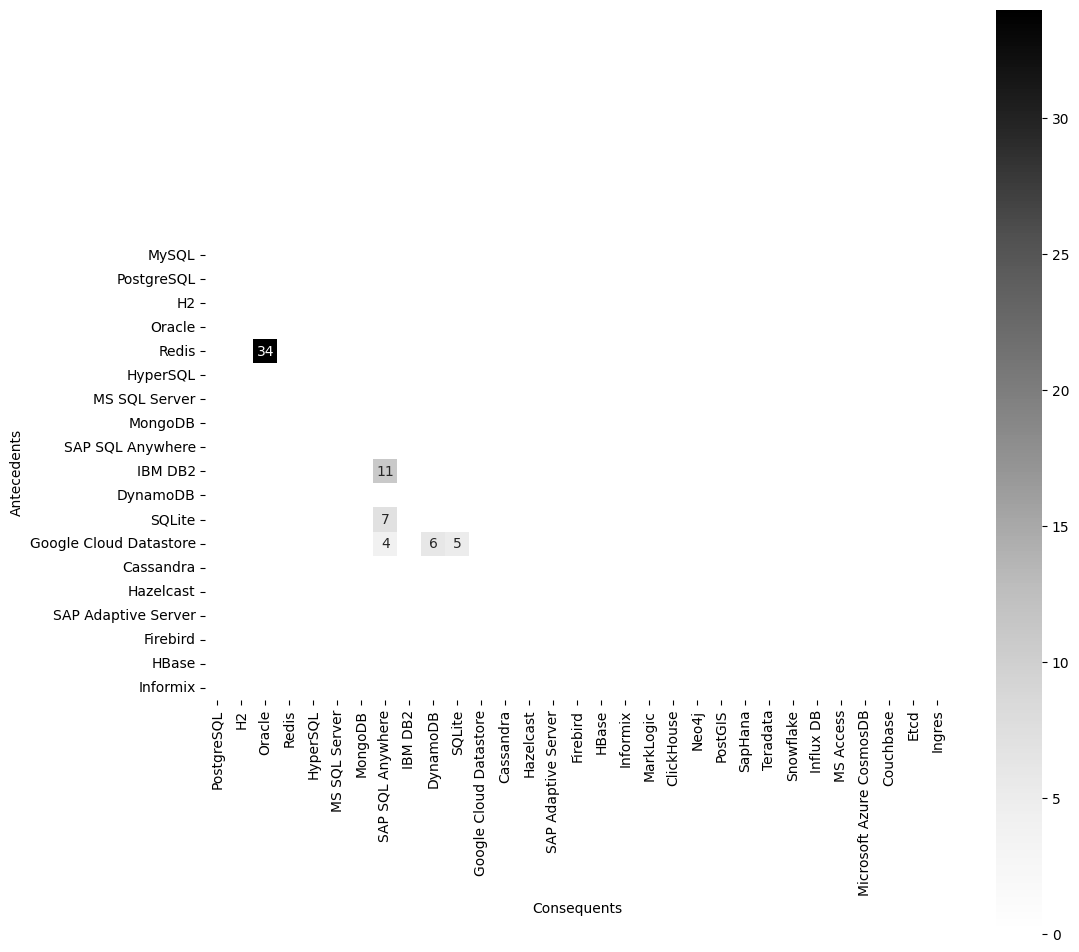

In [23]:
#Generating a heatmap without repetitions, with function ordering, following the tip:
# generate the complete heatmap with the y axis inverted and
# use the parameter mask=np.triu(np.ones_like(df)) in sns.heatmap
import seaborn as sns

pivot = orules1c.pivot(index='Antecedents', columns='Consequents', values='support_abs')
#pivot = pivot.iloc[::-1]
sns.heatmap(pivot, xticklabels=True, yticklabels=True, vmin=0, annot=True, cmap=sns.color_palette("Greys", as_cmap=True),
    mask=np.triu(np.ones_like(pivot, dtype=bool)),square=True)
fig = plt.gcf()
fig.set_size_inches(12, 12)

In [24]:
lista = []
lista = orules1c['Antecedents'].drop_duplicates()
lista

0                       MySQL
31                 PostgreSQL
61                         H2
86                     Oracle
111                     Redis
132                  HyperSQL
149             MS SQL Server
172                   MongoDB
190          SAP SQL Anywhere
195                   IBM DB2
209                  DynamoDB
218                    SQLite
227    Google Cloud Datastore
235                 Cassandra
241                 Hazelcast
244       SAP Adaptive Server
248                  Firebird
250                     HBase
251                  Informix
Name: Antecedents, dtype: category
Categories (32, object): ['MySQL', 'PostgreSQL', 'H2', 'Oracle', ..., 'Microsoft Azure CosmosDB', 'Couchbase', 'Etcd', 'Ingres']

In [25]:
pivot = orules1c.pivot(index='Antecedents', columns='Consequents', values='support_abs')

In [26]:
pivot = pivot.reset_index()

In [27]:
pivot

Consequents,Antecedents,PostgreSQL,H2,Oracle,Redis,HyperSQL,MS SQL Server,MongoDB,SAP SQL Anywhere,IBM DB2,...,PostGIS,SapHana,Teradata,Snowflake,Influx DB,MS Access,Microsoft Azure CosmosDB,Couchbase,Etcd,Ingres
0,MySQL,64.0,57.0,52.0,47.0,40.0,45.0,28.0,12.0,26.0,...,7.0,7.0,6.0,6.0,5.0,5.0,5.0,5.0,5.0,4.0
1,PostgreSQL,NaN,52.0,52.0,41.0,34.0,40.0,23.0,12.0,26.0,...,8.0,7.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0
2,H2,NaN,NaN,43.0,37.0,28.0,33.0,26.0,11.0,22.0,...,7.0,6.0,5.0,5.0,NaN,5.0,NaN,NaN,NaN,4.0
3,Oracle,NaN,NaN,NaN,NaN,31.0,39.0,20.0,12.0,24.0,...,7.0,7.0,5.0,5.0,4.0,5.0,NaN,5.0,4.0,4.0
4,Redis,NaN,NaN,34.0,NaN,24.0,28.0,23.0,5.0,13.0,...,4.0,4.0,NaN,NaN,5.0,NaN,5.0,5.0,4.0,NaN
5,HyperSQL,NaN,NaN,NaN,NaN,NaN,26.0,12.0,11.0,18.0,...,6.0,5.0,5.0,NaN,NaN,5.0,NaN,NaN,NaN,4.0
6,MS SQL Server,NaN,NaN,NaN,NaN,NaN,NaN,17.0,11.0,22.0,...,5.0,7.0,5.0,5.0,NaN,4.0,4.0,5.0,NaN,4.0
7,MongoDB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,9.0,...,NaN,5.0,4.0,NaN,5.0,NaN,4.0,4.0,4.0,NaN
8,SAP SQL Anywhere,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,IBM DB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,...,5.0,6.0,5.0,NaN,NaN,4.0,NaN,NaN,NaN,4.0


In [28]:
#Test generating the graph with all the rules ordered with the sort function
import plotly.express as px 
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#rules1c = rules1c.sort_values(['support_abs'], ascending=[False])
orules1c['support_abs'] = orules1c['support_abs'].astype(int)
fig = px.scatter(orules1c, x="Consequents", y="Antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the last version',
hover_data=['support_abs'], color_continuous_scale = ["silver", "gray"], width=1000, height=1000, text= 'support_abs') 
#fig.title('Correlation of the most frequent databases')
fig.show()

In [29]:
#Test sorting only by support, after the sort function
orules1cd = orules1c.sort_values(by=['support_abs'], ascending=False)
orules1cd

,Antecedents,Consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,MySQL,PostgreSQL,0.484848,95.515152,0.402597,79.311688,0.329004,64,0.678571,1.685484,0.133806,1.858586,1.0,1.0
1,MySQL,H2,0.484848,95.515152,0.389610,76.753247,0.290043,57,0.598214,1.535417,0.101141,1.519192,1.0,1.0
2,MySQL,Oracle,0.484848,95.515152,0.341991,67.372294,0.264069,52,0.544643,1.592563,0.098255,1.445039,1.0,1.0
32,PostgreSQL,Oracle,0.402597,79.311688,0.341991,67.372294,0.264069,52,0.655914,1.917926,0.126384,1.912338,1.0,1.0
31,PostgreSQL,H2,0.402597,79.311688,0.389610,76.753247,0.264069,52,0.655914,1.683513,0.107213,1.773945,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,IBM DB2,MS Access,0.134199,26.437229,0.030303,5.969697,0.021645,4,0.161290,5.322581,0.017578,1.156177,1.0,1.0
208,IBM DB2,Ingres,0.134199,26.437229,0.021645,4.264069,0.021645,4,0.161290,7.451613,0.018740,1.166500,1.0,1.0
213,DynamoDB,Neo4j,0.125541,24.731602,0.047619,9.380952,0.021645,4,0.172414,3.620690,0.015667,1.150794,1.0,1.0
214,DynamoDB,Snowflake,0.125541,24.731602,0.034632,6.822511,0.021645,4,0.172414,4.978448,0.017297,1.166486,1.0,1.0


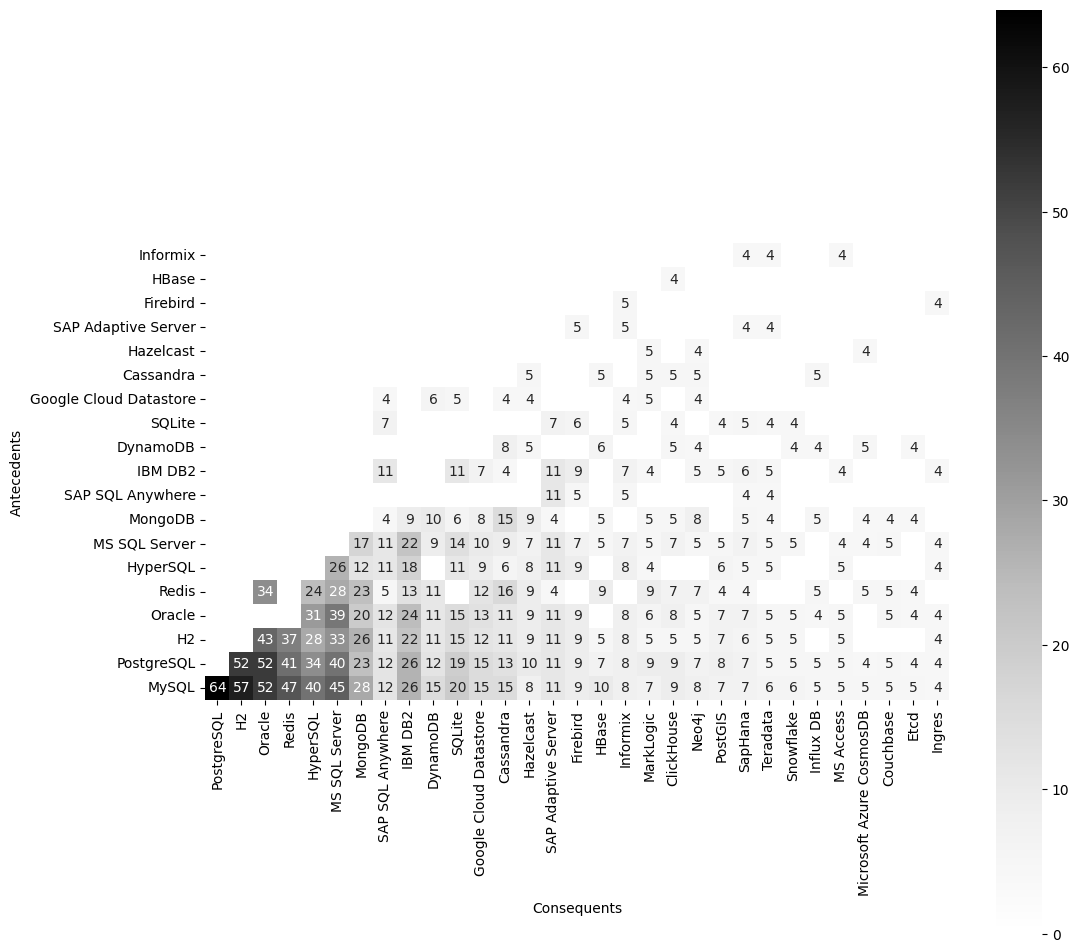

In [30]:
#Test sorting only by support, after the sort function
import seaborn as sns
pivot = orules1c.pivot(index='Antecedents', columns='Consequents', values='support_abs')
pivot = pivot.iloc[::-1]

#mask = np.triu(np.ones_like(pivot))

sns.heatmap(pivot, xticklabels=True, yticklabels=True, vmin=0, annot=True, cmap=sns.color_palette("Greys", as_cmap=True), square=True)

fig = plt.gcf()
fig.set_size_inches(12, 12)
plt.savefig(IMAGES_DIR+"/fig14.pdf", format="pdf", bbox_inches="tight")

Running the cells grouping by consequents and antecedents to identify the most used DBs together

In [31]:
rules1c = df2.groupby(['antecedents','consequents']).mean().sort_values(['support',], ascending=[False])

#sum().plot(kind='line')

#rules1c = rules1c[(rules1c['support'] >= 0.07)] 
rules1c

antecedent support  antecedent_sup_abs  \
antecedents consequents                                             
MySQL       PostgreSQL               0.484848           95.515152   
PostgreSQL  MySQL                    0.402597           79.311688   
MySQL       H2                       0.484848           95.515152   
H2          MySQL                    0.389610           76.753247   
            PostgreSQL               0.389610           76.753247   
...                                       ...                 ...   
Ingres      HyperSQL                 0.021645            4.264069   
            IBM DB2                  0.021645            4.264069   
            MS SQL Server            0.021645            4.264069   
            MySQL                    0.021645            4.264069   
Teradata    SQLite                   0.034632            6.822511   

                           consequent support  consequent_sup_abs   support  \
antecedents consequents                                                       
MySQL       PostgreSQL               0.402597           79.311688  0.329004   
PostgreSQL  MySQL                    0.484848           95.515152  0.329004   
MySQL       H2                       0.389610           76.753247  0.290043   
H2          MySQL                    0.484848           95.515152  0.290043   
            PostgreSQL               0.402597           79.311688  0.264069   
...                                       ...                 ...       ...   
Ingres      HyperSQL                 0.242424           47.757576  0.021645   
            IBM DB2                  0.134199           26.437229  0.021645   
            MS SQL Server            0.238095           46.904762  0.021645   
            MySQL                    0.484848           95.515152  0.021645   
Teradata    SQLite                   0.125541           24.731602  0.021645   

                           support_abs  confidence      lift  leverage  \
antecedents consequents                                                  
MySQL       PostgreSQL       64.813853    0.678571  1.685484  0.133806   
PostgreSQL  MySQL            64.813853    0.817204  1.685484  0.133806   
MySQL       H2               57.138528    0.598214  1.535417  0.101141   
H2          MySQL            57.138528    0.744444  1.535417  0.101141   
            PostgreSQL       52.021645    0.677778  1.683513  0.107213   
...                                ...         ...       ...       ...   
Ingres      HyperSQL          4.264069    1.000000  4.125000  0.016398   
            IBM DB2           4.264069    1.000000  7.451613  0.018740   
            MS SQL Server     4.264069    1.000000  4.200000  0.016491   
            MySQL             4.264069    1.000000  2.062500  0.011150   
Teradata    SQLite            4.264069    0.625000  4.978448  0.017297   

                           conviction  antecedent_len  consequente_len  
antecedents consequents                                                 
MySQL       PostgreSQL       1.858586             1.0              1.0  
PostgreSQL  MySQL            2.818182             1.0              1.0  
MySQL       H2               1.519192             1.0              1.0  
H2          MySQL            2.015810             1.0              1.0  
            PostgreSQL       1.854008             1.0              1.0  
...                               ...             ...              ...  
Ingres      HyperSQL              inf             1.0              1.0  
            IBM DB2               inf             1.0              1.0  
            MS SQL Server         inf             1.0              1.0  
            MySQL                 inf             1.0              1.0  
Teradata    SQLite           2.331890             1.0              1.0  

[508 rows x 12 columns]

In [32]:
#rules1ca = rules1c.groupby(['consequents']).mean().sort_values(['consequent_sup_abs','support_abs'], ascending=[False,False])
rules1ca = rules1c.groupby(['consequents']).mean().sort_values(['support'], ascending=[False])
rules1ca

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
consequents,,,,,,,,,,,,
MySQL,0.115487,22.750873,0.484848,95.515152,0.094261,18.569334,0.879563,1.814098,0.038267,NaN,1.0,1.0
PostgreSQL,0.118140,23.273565,0.402597,79.311688,0.088535,17.441419,0.832592,2.068051,0.040972,NaN,1.0,1.0
H2,0.131954,25.995030,0.389610,76.753247,0.086420,17.024691,0.723172,1.856141,0.035009,NaN,1.0,1.0
Oracle,0.125093,24.643380,0.341991,67.372294,0.082848,16.321093,0.773180,2.260817,0.040067,NaN,1.0,1.0
Redis,0.140693,27.716450,0.350649,69.077922,0.078644,15.492785,0.642227,1.831537,0.029310,NaN,1.0,1.0
HyperSQL,0.154073,30.352420,0.242424,47.757576,0.075364,14.846714,0.639663,2.638611,0.038013,NaN,1.0,1.0
MS SQL Server,0.130019,25.613823,0.238095,46.904762,0.071503,14.086132,0.666335,2.798609,0.040546,NaN,1.0,1.0
IBM DB2,0.157812,31.088941,0.134199,26.437229,0.060409,11.900630,0.554800,4.134152,0.039231,NaN,1.0,1.0
MongoDB,0.146320,28.825108,0.186147,36.670996,0.055758,10.984242,0.516382,2.774050,0.028520,NaN,1.0,1.0


In [33]:
#rules1ca = rules1c.groupby('antecedents').mean().sort_values(['antecedent_sup_abs','support_abs'], ascending=[False,False])
rules1ca = rules1c.groupby('antecedents').mean().sort_values('support', ascending=False)
rules1ca

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
MySQL,0.484848,95.515152,0.115487,22.750873,0.094261,18.569334,0.194412,1.814098,0.038267,1.138424,1.0,1.0
PostgreSQL,0.402597,79.311688,0.118140,23.273565,0.088535,17.441419,0.219910,2.068051,0.040972,1.216320,1.0,1.0
H2,0.389610,76.753247,0.131954,25.995030,0.086420,17.024691,0.221811,1.856141,0.035009,1.173338,1.0,1.0
Oracle,0.341991,67.372294,0.125093,24.643380,0.082848,16.321093,0.242252,2.260817,0.040067,1.253321,1.0,1.0
Redis,0.350649,69.077922,0.140693,27.716450,0.078644,15.492785,0.224280,1.831537,0.029310,1.146169,1.0,1.0
HyperSQL,0.242424,47.757576,0.154073,30.352420,0.075364,14.846714,0.310877,2.638611,0.038013,1.367468,1.0,1.0
MS SQL Server,0.238095,46.904762,0.130019,25.613823,0.071503,14.086132,0.300313,2.798609,0.040546,1.871372,1.0,1.0
IBM DB2,0.134199,26.437229,0.157812,31.088941,0.060409,11.900630,0.450147,4.134152,0.039231,NaN,1.0,1.0
MongoDB,0.186147,36.670996,0.146320,28.825108,0.055758,10.984242,0.299535,2.774050,0.028520,1.310974,1.0,1.0


In [34]:
# To filter only the 10 most used in the current version
rules1cb = rules1ca[(rules1ca['support'] >= 0.05)] 
rules1cb

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
MySQL,0.484848,95.515152,0.115487,22.750873,0.094261,18.569334,0.194412,1.814098,0.038267,1.138424,1.0,1.0
PostgreSQL,0.402597,79.311688,0.118140,23.273565,0.088535,17.441419,0.219910,2.068051,0.040972,1.216320,1.0,1.0
H2,0.389610,76.753247,0.131954,25.995030,0.086420,17.024691,0.221811,1.856141,0.035009,1.173338,1.0,1.0
Oracle,0.341991,67.372294,0.125093,24.643380,0.082848,16.321093,0.242252,2.260817,0.040067,1.253321,1.0,1.0
Redis,0.350649,69.077922,0.140693,27.716450,0.078644,15.492785,0.224280,1.831537,0.029310,1.146169,1.0,1.0
HyperSQL,0.242424,47.757576,0.154073,30.352420,0.075364,14.846714,0.310877,2.638611,0.038013,1.367468,1.0,1.0
MS SQL Server,0.238095,46.904762,0.130019,25.613823,0.071503,14.086132,0.300313,2.798609,0.040546,1.871372,1.0,1.0
IBM DB2,0.134199,26.437229,0.157812,31.088941,0.060409,11.900630,0.450147,4.134152,0.039231,NaN,1.0,1.0
MongoDB,0.186147,36.670996,0.146320,28.825108,0.055758,10.984242,0.299535,2.774050,0.028520,1.310974,1.0,1.0


Identifying the antecedents and consequences that lead to the use of the 10 most used DBs

In [35]:
rules2 = df[ (df['consequents'].str.contains('MySQL')) &(df['confidence'] > 0.7)]
rules2

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
310,Informix,MySQL,0.043290,8.528139,0.484848,95.515152,0.043290,8.528139,1.000000,2.062500,0.022301,inf,1,1
313,Snowflake,MySQL,0.034632,6.822511,0.484848,95.515152,0.034632,6.822511,1.000000,2.062500,0.017841,inf,1,1
315,SapHana,MySQL,0.038961,7.675325,0.484848,95.515152,0.038961,7.675325,1.000000,2.062500,0.020071,inf,1,1
316,SAP SQL Anywhere,MySQL,0.064935,12.792208,0.484848,95.515152,0.064935,12.792208,1.000000,2.062500,0.033451,inf,1,1
319,Firebird,MySQL,0.047619,9.380952,0.484848,95.515152,0.047619,9.380952,1.000000,2.062500,0.024531,inf,1,1
321,ClickHouse,MySQL,0.047619,9.380952,0.484848,95.515152,0.047619,9.380952,1.000000,2.062500,0.024531,inf,1,1
323,SAP Adaptive Server,MySQL,0.060606,11.939394,0.484848,95.515152,0.060606,11.939394,1.000000,2.062500,0.031221,inf,1,1
325,Ingres,MySQL,0.021645,4.264069,0.484848,95.515152,0.021645,4.264069,1.000000,2.062500,0.011150,inf,1,1
327,IBM DB2,MySQL,0.134199,26.437229,0.484848,95.515152,0.134199,26.437229,1.000000,2.062500,0.069133,inf,1,1
328,MS Access,MySQL,0.030303,5.969697,0.484848,95.515152,0.030303,5.969697,1.000000,2.062500,0.015611,inf,1,1


In [36]:
rules3 = df[(df['consequents'].str.contains('PostgreSQL')) | (df['antecedents'].str.contains('PostgreSQL'))] #(df['confidence'] > 0.7) ]
rules3

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
226,PostgreSQL,ClickHouse,0.402597,79.311688,0.047619,9.380952,0.047619,9.380952,0.118280,2.483871,0.028448,1.080139,1,1
227,PostgreSQL,Firebird,0.402597,79.311688,0.047619,9.380952,0.047619,9.380952,0.118280,2.483871,0.028448,1.080139,1,1
228,Firebird,PostgreSQL,0.047619,9.380952,0.402597,79.311688,0.047619,9.380952,1.000000,2.483871,0.028448,inf,1,1
229,ClickHouse,PostgreSQL,0.047619,9.380952,0.402597,79.311688,0.047619,9.380952,1.000000,2.483871,0.028448,inf,1,1
230,PostgreSQL,PostGIS,0.402597,79.311688,0.043290,8.528139,0.043290,8.528139,0.107527,2.483871,0.025862,1.071976,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,PostgreSQL,HBase,0.402597,79.311688,0.064935,12.792208,0.038961,7.675325,0.096774,1.490323,0.012818,1.035250,1,1
464,PostgreSQL,Google Cloud Datastore,0.402597,79.311688,0.129870,25.584416,0.077922,15.350649,0.193548,1.490323,0.025637,1.078961,1,1
465,Google Cloud Datastore,PostgreSQL,0.129870,25.584416,0.402597,79.311688,0.077922,15.350649,0.600000,1.490323,0.025637,1.493506,1,1
486,PostgreSQL,DynamoDB,0.402597,79.311688,0.125541,24.731602,0.064935,12.792208,0.161290,1.284761,0.014393,1.042624,1,1


In [37]:
rules4 = df[(df['consequents'].str.contains('H2')) & (df['confidence'] > 0.7) ]
rules4

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
217,Firebird,H2,0.047619,9.380952,0.38961,76.753247,0.047619,9.380952,1.000000,2.566667,0.029066,inf,1,1
219,Ingres,H2,0.021645,4.264069,0.38961,76.753247,0.021645,4.264069,1.000000,2.566667,0.013212,inf,1,1
221,Informix,H2,0.043290,8.528139,0.38961,76.753247,0.043290,8.528139,1.000000,2.566667,0.026424,inf,1,1
264,SAP SQL Anywhere,H2,0.064935,12.792208,0.38961,76.753247,0.060606,11.939394,0.933333,2.395556,0.035307,9.155844,1,1
266,SAP Adaptive Server,H2,0.060606,11.939394,0.38961,76.753247,0.056277,11.086580,0.928571,2.383333,0.032664,8.545455,1,1
274,PostGIS,H2,0.043290,8.528139,0.38961,76.753247,0.038961,7.675325,0.900000,2.310000,0.022095,6.103896,1,1
276,SapHana,H2,0.038961,7.675325,0.38961,76.753247,0.034632,6.822511,0.888889,2.281481,0.019452,5.493506,1,1
283,Teradata,H2,0.034632,6.822511,0.38961,76.753247,0.030303,5.969697,0.875000,2.245833,0.016810,4.883117,1,1
290,MS Access,H2,0.030303,5.969697,0.38961,76.753247,0.025974,5.116883,0.857143,2.200000,0.014168,4.272727,1,1
298,IBM DB2,H2,0.134199,26.437229,0.38961,76.753247,0.112554,22.173160,0.838710,2.152688,0.060269,3.784416,1,1


In [38]:
rules5 = df[(df['consequents'].str.contains('Oracle')) & (df['confidence'] > 0.7) ]
rules5

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
187,Firebird,Oracle,0.047619,9.380952,0.341991,67.372294,0.047619,9.380952,1.000000,2.924051,0.031334,inf,1,1
188,Couchbase,Oracle,0.025974,5.116883,0.341991,67.372294,0.025974,5.116883,1.000000,2.924051,0.017091,inf,1,1
190,Ingres,Oracle,0.021645,4.264069,0.341991,67.372294,0.021645,4.264069,1.000000,2.924051,0.014243,inf,1,1
191,SAP Adaptive Server,Oracle,0.060606,11.939394,0.341991,67.372294,0.060606,11.939394,1.000000,2.924051,0.039879,inf,1,1
192,MS Access,Oracle,0.030303,5.969697,0.341991,67.372294,0.030303,5.969697,1.000000,2.924051,0.019940,inf,1,1
194,Informix,Oracle,0.043290,8.528139,0.341991,67.372294,0.043290,8.528139,1.000000,2.924051,0.028485,inf,1,1
195,SapHana,Oracle,0.038961,7.675325,0.341991,67.372294,0.038961,7.675325,1.000000,2.924051,0.025637,inf,1,1
196,SAP SQL Anywhere,Oracle,0.064935,12.792208,0.341991,67.372294,0.064935,12.792208,1.000000,2.924051,0.042728,inf,1,1
205,IBM DB2,Oracle,0.134199,26.437229,0.341991,67.372294,0.125541,24.731602,0.935484,2.735402,0.079646,10.199134,1,1
208,ClickHouse,Oracle,0.047619,9.380952,0.341991,67.372294,0.043290,8.528139,0.909091,2.658228,0.027005,7.238095,1,1


In [39]:
rules6 = df[(df['consequents'].str.contains('Ehcache'))]# & (df['confidence'] > 0.7) ]
rules6


,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [40]:
rules7 = df[ (df['consequents'].str.contains('Redis')) ] #& (df['confidence'] > 0.7)]
rules7

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
200,Influx DB,Redis,0.025974,5.116883,0.350649,69.077922,0.025974,5.116883,1.000000,2.851852,0.016866,inf,1,1
201,Couchbase,Redis,0.025974,5.116883,0.350649,69.077922,0.025974,5.116883,1.000000,2.851852,0.016866,inf,1,1
213,MarkLogic,Redis,0.051948,10.233766,0.350649,69.077922,0.047619,9.380952,0.916667,2.614198,0.029403,7.792208,1,1
251,Cassandra,Redis,0.095238,18.761905,0.350649,69.077922,0.082251,16.203463,0.863636,2.462963,0.048856,4.761905,1,1
259,Microsoft Azure CosmosDB,Redis,0.030303,5.969697,0.350649,69.077922,0.025974,5.116883,0.857143,2.444444,0.015348,4.545455,1,1
268,Neo4j,Redis,0.047619,9.380952,0.350649,69.077922,0.038961,7.675325,0.818182,2.333333,0.022263,3.571429,1,1
270,ClickHouse,Redis,0.047619,9.380952,0.350649,69.077922,0.038961,7.675325,0.818182,2.333333,0.022263,3.571429,1,1
306,HBase,Redis,0.064935,12.792208,0.350649,69.077922,0.047619,9.380952,0.733333,2.091358,0.024850,2.435065,1,1
340,Etcd,Redis,0.030303,5.969697,0.350649,69.077922,0.021645,4.264069,0.714286,2.037037,0.011019,2.272727,1,1
374,Hazelcast,Redis,0.073593,14.497835,0.350649,69.077922,0.047619,9.380952,0.647059,1.845316,0.021814,1.839827,1,1


In [41]:
rules8 = df[ (df['consequents'].str.contains('SQLite')) & (df['confidence'] > 0.7) ]
rules8

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
55,SapHana,SQLite,0.038961,7.675325,0.125541,24.731602,0.030303,5.969697,0.777778,6.195402,0.025412,3.935065,1,1
58,Firebird,SQLite,0.047619,9.380952,0.125541,24.731602,0.034632,6.822511,0.727273,5.793103,0.028654,3.206349,1,1
66,Informix,SQLite,0.043290,8.528139,0.125541,24.731602,0.030303,5.969697,0.700000,5.575862,0.024868,2.914863,1,1


In [42]:
rules9 = df[(df['consequents'].str.contains('MongoDB')) & (df['confidence'] > 0.7) ]
rules9

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
68,Influx DB,MongoDB,0.025974,5.116883,0.186147,36.670996,0.025974,5.116883,1.000000,5.372093,0.021139,inf,1,1
85,Neo4j,MongoDB,0.047619,9.380952,0.186147,36.670996,0.043290,8.528139,0.909091,4.883721,0.034426,8.952381,1,1
90,Couchbase,MongoDB,0.025974,5.116883,0.186147,36.670996,0.021645,4.264069,0.833333,4.476744,0.016810,4.883117,1,1
95,Cassandra,MongoDB,0.095238,18.761905,0.186147,36.670996,0.077922,15.350649,0.818182,4.395349,0.060194,4.476190,1,1
130,Microsoft Azure CosmosDB,MongoDB,0.030303,5.969697,0.186147,36.670996,0.021645,4.264069,0.714286,3.837209,0.016004,2.848485,1,1
131,Etcd,MongoDB,0.030303,5.969697,0.186147,36.670996,0.021645,4.264069,0.714286,3.837209,0.016004,2.848485,1,1


In [43]:
rules10 = df[ (df['consequents'].str.contains('MS SQL Server')) & (df['confidence'] > 0.7) ]
rules10

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
103,Ingres,MS SQL Server,0.021645,4.264069,0.238095,46.904762,0.021645,4.264069,1.000000,4.200000,0.016491,inf,1,1
104,Couchbase,MS SQL Server,0.025974,5.116883,0.238095,46.904762,0.025974,5.116883,1.000000,4.200000,0.019790,inf,1,1
106,SapHana,MS SQL Server,0.038961,7.675325,0.238095,46.904762,0.038961,7.675325,1.000000,4.200000,0.029685,inf,1,1
121,SAP SQL Anywhere,MS SQL Server,0.064935,12.792208,0.238095,46.904762,0.060606,11.939394,0.933333,3.920000,0.045145,11.428571,1,1
122,SAP Adaptive Server,MS SQL Server,0.060606,11.939394,0.238095,46.904762,0.056277,11.086580,0.928571,3.900000,0.041847,10.666667,1,1
135,Informix,MS SQL Server,0.043290,8.528139,0.238095,46.904762,0.038961,7.675325,0.900000,3.780000,0.028654,7.619048,1,1
146,IBM DB2,MS SQL Server,0.134199,26.437229,0.238095,46.904762,0.112554,22.173160,0.838710,3.522581,0.080602,4.723810,1,1
152,ClickHouse,MS SQL Server,0.047619,9.380952,0.238095,46.904762,0.038961,7.675325,0.818182,3.436364,0.027623,4.190476,1,1
153,Firebird,MS SQL Server,0.047619,9.380952,0.238095,46.904762,0.038961,7.675325,0.818182,3.436364,0.027623,4.190476,1,1
164,Snowflake,MS SQL Server,0.034632,6.822511,0.238095,46.904762,0.025974,5.116883,0.750000,3.150000,0.017728,3.047619,1,1


In [44]:
rules11 = df[ (df['consequents'] .str.contains('MySQL')) & (df['antecedents'] .str.contains('MariaDB'))|
             (df['antecedents'] .str.contains('MySQL')) & (df['consequents'] .str.contains('MariaDB'))] #& (df['confidence'] > 0.7) ]
rules11

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


Expected Patterns Session
In the rules below, we highlight the dependence presented in opposite directions and the expected correlation.

In [45]:
rules9 = df[((df['antecedents'].str.contains('MariaDB')) & (df['consequents'].str.contains('MySQL'))) | 
((df['antecedents'].str.contains('MySQL')) & (df['consequents'].str.contains('MariaDB')))]
rules9

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [46]:
rules10 = df2[((df2['antecedents'].str.contains('PostgreSQL')) & (df2['consequents'].str.contains('PostGIS'))) | 
((df2['antecedents'].str.contains('PostGIS')) & (df2['consequents'].str.contains('PostgreSQL')))]
rules10

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
230,PostgreSQL,PostGIS,0.402597,79.311688,0.043290,8.528139,0.04329,8.528139,0.107527,2.483871,0.025862,1.071976,1,1
233,PostGIS,PostgreSQL,0.043290,8.528139,0.402597,79.311688,0.04329,8.528139,1.000000,2.483871,0.025862,inf,1,1


In [47]:
rules11a = df[ (df['consequents'] .str.contains('MySQL')) & (df['antecedents'] .str.contains('MariaDB'))|
             (df['antecedents'] .str.contains('MySQL')) & (df['consequents'] .str.contains('MariaDB'))] #& (df['confidence'] > 0.7) ]
rules11a

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [48]:
rules12a = df[ (df['consequents'] .str.contains('PostgreSQL')) & (df['antecedents'] .str.contains('PostGIS'))|
             (df['antecedents'] .str.contains('PostgreSQL')) & (df['consequents'] .str.contains('PostGIS'))] #& (df['confidence'] > 0.7) ]
rules12a

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
230,PostgreSQL,PostGIS,0.402597,79.311688,0.043290,8.528139,0.04329,8.528139,0.107527,2.483871,0.025862,1.071976,1,1
233,PostGIS,PostgreSQL,0.043290,8.528139,0.402597,79.311688,0.04329,8.528139,1.000000,2.483871,0.025862,inf,1,1


Unexpected Patterns Session
In the rules below we highlight competition and high lift values.

In [49]:
rules12 = df2[(df2['lift'] > 10)] #>20
rules12

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Firebird,Ingres,0.047619,9.380952,0.021645,4.264069,0.021645,4.264069,0.454545,21.000000,0.020614,1.793651,1,1
1,Ingres,Firebird,0.021645,4.264069,0.047619,9.380952,0.021645,4.264069,1.000000,21.000000,0.020614,inf,1,1
2,MS Access,Informix,0.030303,5.969697,0.043290,8.528139,0.021645,4.264069,0.714286,16.500000,0.020333,3.348485,1,1
3,Informix,MS Access,0.043290,8.528139,0.030303,5.969697,0.021645,4.264069,0.500000,16.500000,0.020333,1.939394,1,1
4,SAP SQL Anywhere,SAP Adaptive Server,0.064935,12.792208,0.060606,11.939394,0.060606,11.939394,0.933333,15.400000,0.056671,14.090909,1,1
5,SAP Adaptive Server,SAP SQL Anywhere,0.060606,11.939394,0.064935,12.792208,0.060606,11.939394,1.000000,15.400000,0.056671,inf,1,1
6,Firebird,Informix,0.047619,9.380952,0.043290,8.528139,0.030303,5.969697,0.636364,14.700000,0.028242,2.630952,1,1
7,Informix,Firebird,0.043290,8.528139,0.047619,9.380952,0.030303,5.969697,0.700000,14.700000,0.028242,3.174603,1,1
8,Teradata,Informix,0.034632,6.822511,0.043290,8.528139,0.021645,4.264069,0.625000,14.437500,0.020146,2.551227,1,1
9,Informix,Teradata,0.043290,8.528139,0.034632,6.822511,0.021645,4.264069,0.500000,14.437500,0.020146,1.930736,1,1


In [50]:
#if you need to generate the rules in excel
#rules_filter = df2.to_excel('historical_filters.xlsx', index=False)

In [51]:
rules14 = df2[(df2['confidence'] > 0.9)] #>20(['support_abs'], ascending=[False])
rules14 = rules14.sort_values(['lift'], ascending=False)
rules14

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
1,Ingres,Firebird,0.021645,4.264069,0.047619,9.380952,0.021645,4.264069,1.000000,21.000000,0.020614,inf,1,1
5,SAP Adaptive Server,SAP SQL Anywhere,0.060606,11.939394,0.064935,12.792208,0.060606,11.939394,1.000000,15.400000,0.056671,inf,1,1
4,SAP SQL Anywhere,SAP Adaptive Server,0.064935,12.792208,0.060606,11.939394,0.060606,11.939394,0.933333,15.400000,0.056671,14.090909,1,1
17,Influx DB,Cassandra,0.025974,5.116883,0.095238,18.761905,0.025974,5.116883,1.000000,10.500000,0.023500,inf,1,1
34,Firebird,IBM DB2,0.047619,9.380952,0.134199,26.437229,0.047619,9.380952,1.000000,7.451613,0.041229,inf,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,SAP SQL Anywhere,MySQL,0.064935,12.792208,0.484848,95.515152,0.064935,12.792208,1.000000,2.062500,0.033451,inf,1,1
315,SapHana,MySQL,0.038961,7.675325,0.484848,95.515152,0.038961,7.675325,1.000000,2.062500,0.020071,inf,1,1
313,Snowflake,MySQL,0.034632,6.822511,0.484848,95.515152,0.034632,6.822511,1.000000,2.062500,0.017841,inf,1,1
346,MS SQL Server,MySQL,0.238095,46.904762,0.484848,95.515152,0.229437,45.199134,0.963636,1.987500,0.113997,14.166667,1,1


In [52]:
rules15 = df2[(df2['lift'] > 8)] #& (df2['confidence'] > 0.5)] #>20(['support_abs'], ascending=[False])
rules15 = rules15.sort_values(['lift'], ascending=False)
rules15

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Firebird,Ingres,0.047619,9.380952,0.021645,4.264069,0.021645,4.264069,0.454545,21.000000,0.020614,1.793651,1,1
1,Ingres,Firebird,0.021645,4.264069,0.047619,9.380952,0.021645,4.264069,1.000000,21.000000,0.020614,inf,1,1
2,MS Access,Informix,0.030303,5.969697,0.043290,8.528139,0.021645,4.264069,0.714286,16.500000,0.020333,3.348485,1,1
3,Informix,MS Access,0.043290,8.528139,0.030303,5.969697,0.021645,4.264069,0.500000,16.500000,0.020333,1.939394,1,1
4,SAP SQL Anywhere,SAP Adaptive Server,0.064935,12.792208,0.060606,11.939394,0.060606,11.939394,0.933333,15.400000,0.056671,14.090909,1,1
5,SAP Adaptive Server,SAP SQL Anywhere,0.060606,11.939394,0.064935,12.792208,0.060606,11.939394,1.000000,15.400000,0.056671,inf,1,1
6,Firebird,Informix,0.047619,9.380952,0.043290,8.528139,0.030303,5.969697,0.636364,14.700000,0.028242,2.630952,1,1
7,Informix,Firebird,0.043290,8.528139,0.047619,9.380952,0.030303,5.969697,0.700000,14.700000,0.028242,3.174603,1,1
9,Informix,Teradata,0.043290,8.528139,0.034632,6.822511,0.021645,4.264069,0.500000,14.437500,0.020146,1.930736,1,1
8,Teradata,Informix,0.034632,6.822511,0.043290,8.528139,0.021645,4.264069,0.625000,14.437500,0.020146,2.551227,1,1


In [53]:
#rules15_filter = rules15.to_excel('rules_filters_liftv10.xlsx', index=False)